### Tidal elevations to NAVD88 conversion: https://geodesy.noaa.gov/Tidal_Elevation/index.xhtml;jsessionid=69C1903BDFAE54609A9080BC4D41D1D9

# Using the NOAA tidal gage at Mayport for the MHW: https://tidesandcurrents.noaa.gov/datums.html?datum=NAVD88&units=0&epoch=0&id=8720218&name=Mayport+%28Bar+Pilots+Dock%29&state=FL
MHW NAVD88 = 1.70 ft = 0.518 m


In [30]:
import folium
import json
import os
# Show ADCIRC points on map using folium and a geojson
geojson_fn = "CHS ADCIRC Test Points.geojson" 
m = folium.Map(location=[30.3322, -81.6557], tiles="CartoDB Positron", zoom_start=10)

tooltip = folium.GeoJsonTooltip(
    fields=["Point"],
    aliases=["ADCIRC Point"],
    localize=True,
    sticky=False,
    labels=True,
    style="""
        background-color: #F0EFEF;
        border: 2px solid black;
        border-radius: 3px;
        box-shadow: 3px;
    """,
    max_width=800,
)

folium.GeoJson(
    geojson_fn,
    tooltip=tooltip).add_to(m)

# Add the NOAA tide gauge location to folium map
folium.Marker([30.398, -81.428], 
              popup='<i>NOAA Tide Gauge 8720218</i>', 
              tooltip='Mayport (Bar Pilots Dock), FL', 
              icon=folium.Icon(color='red', icon_color='white', icon='ship', angle=0, prefix='fa')).add_to(m)

m

In [3]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
import os
import glob

# Get the list of ADCIRC points from the geojson
with open(geojson_fn) as f:
    data = json.load(f)
    points = [feature["properties"]["Point"] for feature in data["features"]]

In [49]:
storms = []
# look just at point 17808
point = 17808
h5_fn = f"CHS-SA_TS_SimB_ADCIRC01_Peaks/CHS-SA_TS_SimB_Post0_SP{point}_ADCIRC01_Peaks.h5"
with h5py.File(h5_fn, "r") as f:
        peak_wse = f["Water Elevation"][:]
        storms.extend([storm.decode('utf-8') for storm in f['Storm Name'][:]])

print(f"Number of storms: {len(storms)}")

Number of storms: 1059


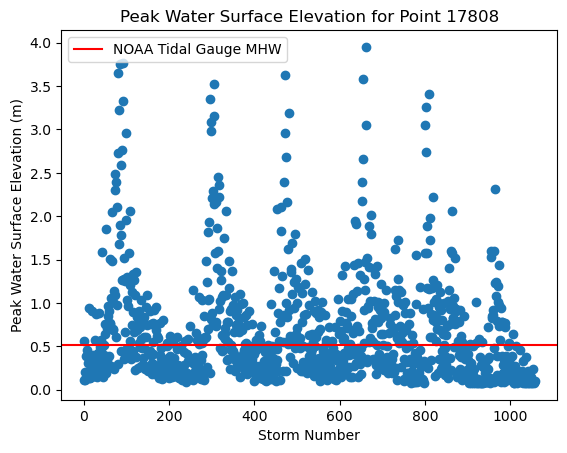

In [39]:
# Make a scatter Plot of the peak water surface elevations for each storm for the ADCIRC location 17808. x-axis is storm number, y-axis is peak water surface elevation.
plt.scatter(range(len(peak_wse)), peak_wse)
plt.xlabel("Storm Number")
plt.ylabel("Peak Water Surface Elevation (m)")
plt.title(f"Peak Water Surface Elevation for Point {point}")
# Add a marker line for the mean peak water surface elevation of the Noaa tide gauge = 0.518 m. With a label of "NOAA Tidal Gauge MHW".
plt.axhline(y=0.518, color='r', linestyle='-', label="NOAA Tidal Gauge MHW")
# Show the legend
plt.legend()

plt.show()


In [50]:
# Get storm list that is above the NOAA MHW value of 0.518 m in to a pandas dataframe.
df = pd.DataFrame({'Storm': storms, 'Peak WSE (m)': peak_wse})
# Limit the dataframe to just the storms that are above the NOAA MHW value of 0.518 m.
df = df[df['Peak WSE (m)'] > 0.518]
#export to csv
df.to_csv('storms_above_MHW_17808.csv', index=False)
df

,Storm,Peak WSE (m)
1,Synthetic_0066,0.561101
12,Synthetic_0077,0.941145
20,Synthetic_0085,0.903874
27,Synthetic_0092,0.576928
29,Synthetic_0094,0.871933
...,...,...
982,Synthetic_1624,0.785078
988,Synthetic_1630,0.719467
989,Synthetic_1631,0.764964
997,Synthetic_1639,0.534902
